In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
%matplotlib inline

In [9]:
current_path = Path.cwd()
data_path = current_path.parents[0] / 'results' 
unsw_data_path = data_path / 'UNSW' / 'UNSW_metrics_exp'
ton_data_path = data_path / 'TON' / 'TON_metrics_exp'
unsw_data_path, ton_data_path

(PosixPath('/share/home/lole4878/workspace/fedpca/FedPG_Abnormal_Detection/results/UNSW/UNSW_metrics_exp'),
 PosixPath('/share/home/lole4878/workspace/fedpca/FedPG_Abnormal_Detection/results/TON/TON_metrics_exp'))

# Accuracy vs Global Iteration

## UNSW Dataset

In [3]:
# Get data from csv file
FedPE_acc_glob_file_name = 'Unsw_FedPE_Global_iter.csv'
FedPG_acc_glob_file_name = 'Unsw_FedPG_Global_iter.csv'
FedPE_acc_glob_file_path = unsw_data_path / FedPE_acc_glob_file_name
FedPG_acc_glob_file_path = unsw_data_path / FedPG_acc_glob_file_name
FedPE_unsw_glob_data = pd.read_csv(FedPE_acc_glob_file_path)
FedPG_unsw_glob_data = pd.read_csv(FedPG_acc_glob_file_path)
FedPE_unsw_glob_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,20,30,2,6.453428,0.620354,0.758246,0.664828,0.708471,0.335172,7.202707
1,20,30,30,2,9.110814,0.580680,0.749187,0.594812,0.663133,0.405188,10.901620
2,20,40,30,2,4.418625,0.733637,0.784246,0.849951,0.815778,0.150049,14.532405
3,20,50,30,2,5.983857,0.785878,0.790530,0.940660,0.859086,0.059340,18.514229
4,20,60,30,2,4.933585,0.788036,0.772768,0.983808,0.865611,0.016192,21.779356
5,20,70,30,2,3.951148,0.782021,0.775859,0.964484,0.859950,0.035516,25.083382
6,20,80,30,2,3.977407,0.817180,0.798128,0.985882,0.882125,0.014118,29.111833
7,20,90,30,2,3.890694,0.817716,0.798478,0.986191,0.882463,0.013809,32.433747
8,20,100,30,2,3.838070,0.821848,0.803393,0.984073,0.884601,0.015927,36.506975
9,20,110,30,2,3.719667,0.812297,0.792289,0.988683,0.879658,0.011317,39.641362


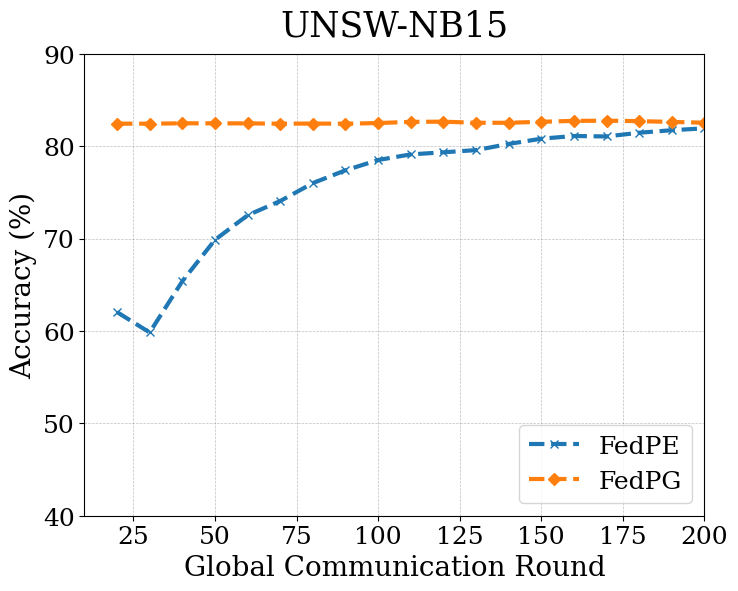

In [74]:
import matplotlib.pyplot as plt

# Data for three lines
glob_iter = FedPE_unsw_glob_data['Global_iter']
FedPE_acc = FedPE_unsw_glob_data['Acc'].ewm(alpha=0.2).mean().values  * 100
FedPG_acc = FedPG_unsw_glob_data['Acc'] * 100

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_acc,
         label='FedPE', marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_acc,
         label='FedPG', marker='D', linestyle='--', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([10, 200])
plt.ylim([40, 90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower right')

plt.title("UNSW-NB15", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('UNSW_AccVsGlob.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


## Ton-IoT Dataset

In [55]:
# Get data from csv file
FedPE_acc_glob_file_name = 'Ton_FedPE_Global_iter.csv'
FedPG_acc_glob_file_name = 'Ton_FedPG_Global_iter.csv'
FedPE_acc_glob_file_path = ton_data_path / FedPE_acc_glob_file_name
FedPG_acc_glob_file_path = ton_data_path / FedPG_acc_glob_file_name
FedPE_ton_glob_data = pd.read_csv(FedPE_acc_glob_file_path)
FedPG_ton_glob_data = pd.read_csv(FedPG_acc_glob_file_path)
FedPE_ton_glob_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,20,30,14,13.349310,0.754301,0.834922,0.886044,0.859724,0.113956,9.046443
1,20,30,30,14,14.139578,0.711766,0.859986,0.789310,0.823134,0.210690,13.563367
2,20,40,30,14,16.690756,0.662770,0.826443,0.763478,0.793714,0.236522,18.926919
3,20,50,30,14,10.751083,0.689409,0.826732,0.802730,0.814554,0.197270,24.125967
4,20,60,30,14,4.549337,0.840933,0.851206,0.984989,0.913223,0.015011,28.840611
5,20,70,30,14,12.031695,0.845185,0.854989,0.984847,0.915336,0.015153,33.751174
6,20,80,30,14,5.120831,0.677735,0.832450,0.777181,0.803866,0.222819,37.755874
7,20,90,30,14,9.418816,0.841715,0.851174,0.986156,0.913706,0.013844,42.203426
8,20,100,30,14,4.852797,0.849768,0.849934,0.999717,0.918761,0.000283,47.585086
9,20,110,30,14,6.135695,0.852953,0.852555,0.999876,0.920358,0.000124,53.852893


In [56]:
FedPG_ton_glob_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,20,30,2,3.555307,0.886007,0.905569,0.966653,0.935114,0.033347,9.115821
1,20,30,30,2,3.775870,0.885857,0.905419,0.966653,0.935035,0.033347,13.215980
2,20,40,30,2,3.611859,0.885707,0.905269,0.966653,0.934955,0.033347,17.555969
3,20,50,30,2,3.779935,0.885947,0.905509,0.966653,0.935082,0.033347,22.734460
4,20,60,30,2,3.773888,0.886053,0.905614,0.966653,0.935138,0.033347,27.230492
5,20,70,30,2,3.680504,0.886053,0.905614,0.966653,0.935138,0.033347,30.625239
6,20,80,30,2,3.519665,0.886368,0.905929,0.966653,0.935306,0.033347,35.451740
7,20,90,30,2,3.806065,0.886023,0.905584,0.966653,0.935122,0.033347,41.297827
8,20,100,30,2,3.528749,0.885932,0.905494,0.966653,0.935074,0.033347,44.396846
9,20,110,30,2,3.584894,0.886113,0.905674,0.966653,0.935170,0.033347,49.335563


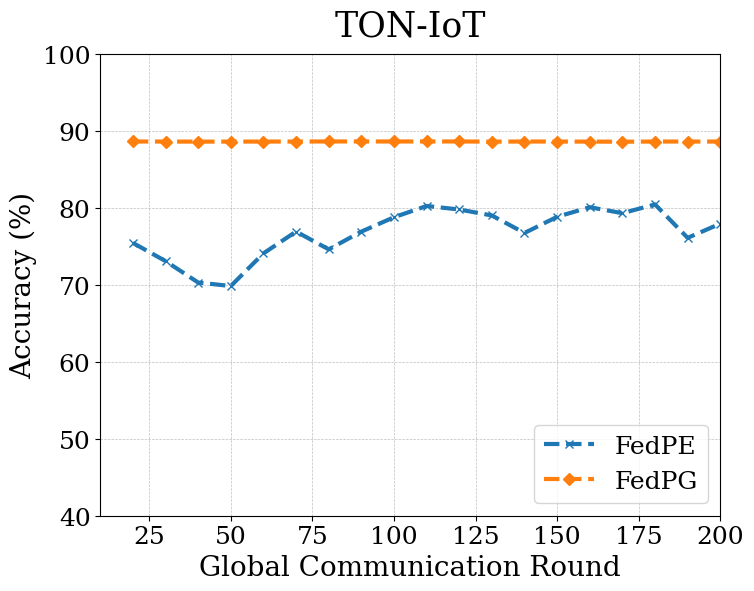

In [76]:
import matplotlib.pyplot as plt
import numpy as np
# Data for three lines
glob_iter = FedPE_ton_glob_data['Global_iter']
FedPE_acc = FedPE_ton_glob_data['Acc'].ewm(alpha=0.2).mean().values * 100
FedPG_acc = FedPG_ton_glob_data['Acc'].ewm(alpha=0.2).mean().values * 100


# Define a function to apply moving average smoothing
#def smooth_data(data, window_size=5):
#    window = np.ones(window_size)/window_size
#    return np.convolve(data, window, mode='valid')

#FedPE_acc = smooth_data(FedPE_acc)

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_acc, 
         label='FedPE', marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_acc, 
         label='FedPG', marker='D', linestyle='--', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([10, 200])
plt.ylim([40, 100])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower right')

plt.title("TON-IoT", fontsize=25, y=1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('Ton_AccVsGlob.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


# Rank-K vs Acc

## UNSW

In [4]:
# Get data from csv file
FedPE_acc_glob_file_name = 'Unsw_FedPE_Rank_k.csv'
FedPG_acc_glob_file_name = 'Unsw_FedPG_Rank_k.csv'
FedPE_rank_file_path = unsw_data_path / FedPE_acc_glob_file_name
FedPG_rank_file_path = unsw_data_path / FedPG_acc_glob_file_name
FedPE_unsw_rank_data = pd.read_csv(FedPE_rank_file_path)
FedPG_unsw_rank_data = pd.read_csv(FedPG_rank_file_path)
FedPE_unsw_rank_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,200,30,2,3.557248,0.830313,0.812715,0.981669,0.889237,0.018331,73.768823
1,20,200,30,6,3.856600,0.849124,0.826820,0.989897,0.901039,0.010103,74.372929
2,20,200,30,10,3.130827,0.791863,0.823896,0.890342,0.855831,0.109658,75.688612
3,20,200,30,14,3.381900,0.786383,0.861208,0.825113,0.842774,0.174887,75.909225
4,20,200,30,18,3.754159,0.794986,0.776108,0.990184,0.870173,0.009816,76.072802
5,20,200,30,22,2.369785,0.791557,0.785815,0.961727,0.864917,0.038273,77.025466
6,20,200,30,26,2.157260,0.724178,0.821893,0.769170,0.794658,0.230830,77.648330
7,20,200,30,30,2.118132,0.682437,0.808029,0.711330,0.756602,0.288670,75.881963
8,20,200,30,34,2.090370,0.794419,0.779123,0.982154,0.868936,0.017846,77.651303
9,20,200,30,39,2.030823,0.775148,0.779785,0.941962,0.853235,0.058038,77.560007


In [22]:
FedPG_unsw_rank_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,30,30,2,3.435806e+00,0.823731,0.803195,0.988066,0.886091,0.011934,10.409232
1,20,30,30,6,2.900767e+00,0.824053,0.806034,0.982970,0.885753,0.017030,10.445337
2,20,30,30,10,2.352735e+00,0.824389,0.808904,0.977941,0.885427,0.022059,10.525764
3,20,30,30,14,2.234084e+00,0.727653,0.792539,0.822907,0.807437,0.177093,10.568605
4,20,30,30,18,1.846601e+00,0.843277,0.819498,0.992809,0.897866,0.007191,10.663491
5,20,30,30,22,1.540220e+00,0.784057,0.762828,0.999559,0.865294,0.000441,10.763910
6,20,30,30,26,1.105273e+00,0.831920,0.820301,0.970330,0.889030,0.029670,10.625288
7,20,30,30,30,7.183949e-01,0.748423,0.775978,0.896144,0.831743,0.103856,10.950501
8,20,30,30,34,4.674348e-01,0.804384,0.783327,0.992654,0.875654,0.007346,11.133095
9,20,30,30,39,5.827789e-13,0.556067,0.836084,0.448050,0.583440,0.551950,11.304365


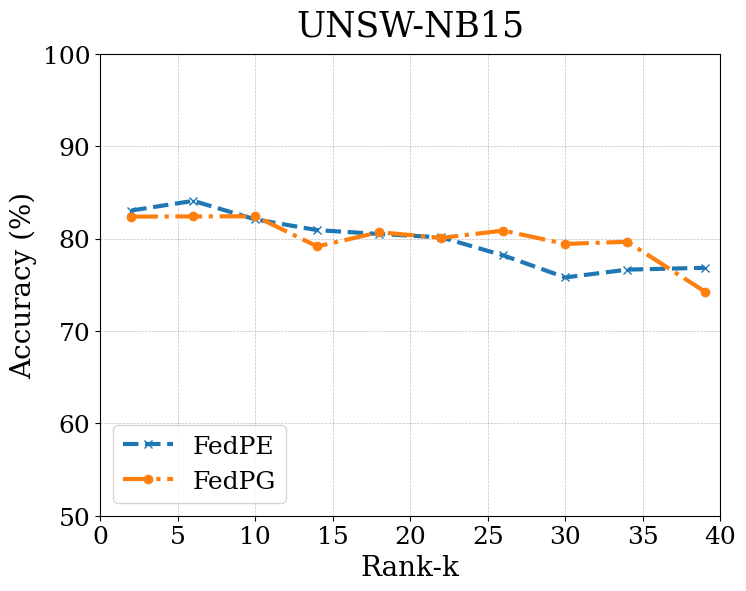

In [30]:
import matplotlib.pyplot as plt

alpha = 0.2
select = [0, 1, 2, 4, 6, 8, 9]
# Data for three lines
glob_iter = FedPE_unsw_rank_data['Rank']
FedPE_acc = FedPE_unsw_rank_data['Acc'].ewm(alpha=alpha).mean().values * 100
FedPG_acc = FedPG_unsw_rank_data['Acc'].ewm(alpha=alpha).mean().values * 100

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_acc, 
         label='FedPE',
         #color='blue',
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_acc,
         label='FedPG',
         #color='red',
         marker='o', linestyle='-.', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Rank-k', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([0, 40])
plt.ylim([50, 100])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower left')

plt.title("UNSW-NB15", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('UNSW_AccVsRank.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


## Ton

In [31]:
# Get data from csv file
FedPE_rank_file_name = 'Ton_FedPE_Rank_k.csv'
FedPG_rank_file_name = 'Ton_FedPG_Rank_k.csv'
FedPE_rank_file_path = ton_data_path / FedPE_rank_file_name
FedPG_rank_file_path = ton_data_path / FedPG_rank_file_name
FedPE_ton_rank_data = pd.read_csv(FedPE_rank_file_path)
FedPG_ton_rank_data = pd.read_csv(FedPG_rank_file_path)
FedPE_ton_rank_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,200,30,2,3.411200,0.850384,0.850669,0.999363,0.919041,0.000637,93.233338
1,20,200,30,4,4.135328,0.870607,0.868236,0.999399,0.929211,0.000601,90.317333
2,20,200,30,6,3.430196,0.788272,0.870737,0.881730,0.876199,0.118270,93.602925
3,20,200,30,8,4.314479,0.742086,0.840546,0.859540,0.849937,0.140460,92.773627
4,20,200,30,10,3.639657,0.777394,0.877098,0.858302,0.867598,0.141698,94.388014
5,20,200,30,12,3.732251,0.840453,0.850618,0.985271,0.913007,0.014729,94.219309
6,20,200,30,14,3.446695,0.884535,0.880801,0.999363,0.936344,0.000637,94.379225
7,20,200,30,16,3.037107,0.742927,0.836240,0.867320,0.851496,0.132680,95.671580
8,20,200,30,18,3.502298,0.804258,0.859738,0.919692,0.888705,0.080308,95.390715
9,20,200,30,23,4.474338,0.577235,0.822584,0.640663,0.720315,0.359337,93.712096


In [32]:
glob_iter[:23]

0     2
1     6
2    10
3    14
4    18
5    22
6    26
7    30
8    34
9    39
Name: Rank, dtype: int64

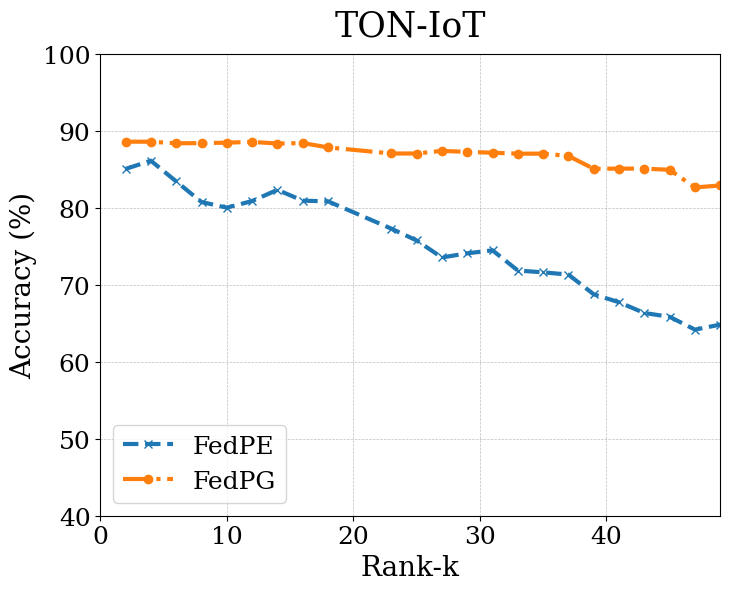

In [41]:
import matplotlib.pyplot as plt

alpha = 0.1
# Data for three lines
select = [0,1,3,5,7,9,11,13,15,17,19,21]
glob_iter = FedPE_ton_rank_data['Rank'][:23]
FedPE_acc = FedPE_ton_rank_data['Acc'][:23].ewm(alpha=alpha).mean().values * 100
FedPG_acc = FedPG_ton_rank_data['Acc'][:23].ewm(alpha=alpha).mean().values * 100

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_acc, 
         label='FedPE', 
         #color='blue', 
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_acc,
         label='FedPG',
         #color='red', 
         marker='o', linestyle='-.', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Rank-k', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([0, 49])
plt.ylim([40, 100])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower left')

plt.title("TON-IoT", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('Ton_RankVsAcc.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


# Rank-K vs Loss

## UNSW

In [3]:
# Get data from csv file
FedPE_acc_glob_file_name = 'Unsw_FedPE_Rank_k.csv'
FedPG_acc_glob_file_name = 'Unsw_FedPG_Rank_k.csv'
FedPE_rank_file_path = unsw_data_path / FedPE_acc_glob_file_name
FedPG_rank_file_path = unsw_data_path / FedPG_acc_glob_file_name
FedPE_unsw_rank_data = pd.read_csv(FedPE_rank_file_path)
FedPG_unsw_rank_data = pd.read_csv(FedPG_rank_file_path)
FedPE_unsw_rank_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,200,30,2,3.557248,0.830313,0.812715,0.981669,0.889237,0.018331,73.768823
1,20,200,30,6,3.856600,0.849124,0.826820,0.989897,0.901039,0.010103,74.372929
2,20,200,30,10,3.130827,0.791863,0.823896,0.890342,0.855831,0.109658,75.688612
3,20,200,30,14,3.381900,0.786383,0.861208,0.825113,0.842774,0.174887,75.909225
4,20,200,30,18,3.754159,0.794986,0.776108,0.990184,0.870173,0.009816,76.072802
5,20,200,30,22,2.369785,0.791557,0.785815,0.961727,0.864917,0.038273,77.025466
6,20,200,30,26,2.157260,0.724178,0.821893,0.769170,0.794658,0.230830,77.648330
7,20,200,30,30,2.118132,0.682437,0.808029,0.711330,0.756602,0.288670,75.881963
8,20,200,30,34,2.090370,0.794419,0.779123,0.982154,0.868936,0.017846,77.651303
9,20,200,30,39,2.030823,0.775148,0.779785,0.941962,0.853235,0.058038,77.560007


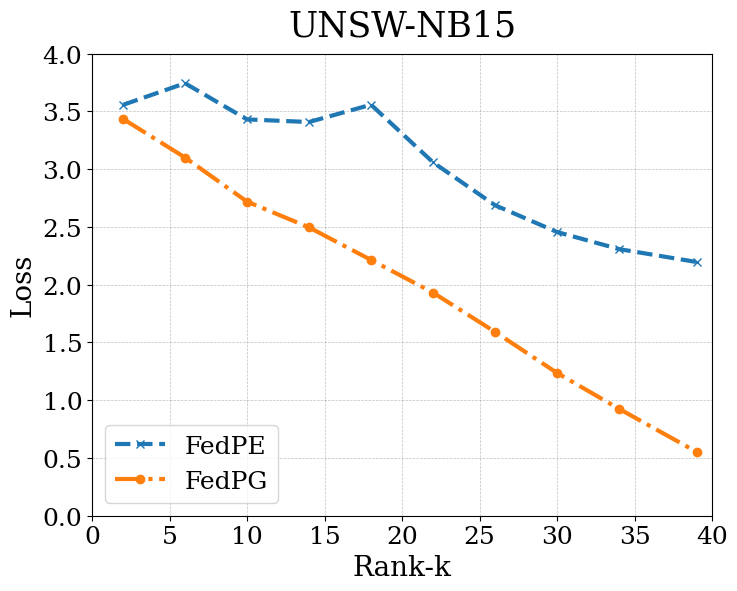

In [4]:
import matplotlib.pyplot as plt

alpha = 0.4
# Data for three lines
select = [0, 1, 2, 4, 6, 8, 9]
glob_iter = FedPE_unsw_rank_data['Rank']
FedPE_acc = FedPE_unsw_rank_data['Loss'].ewm(alpha=alpha).mean().values 
FedPG_acc = FedPG_unsw_rank_data['Loss'].ewm(alpha=alpha).mean().values

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_acc,
         label='FedPE',
         #color='blue',
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_acc, 
         label='FedPG', 
         #color='red',
         marker='o', linestyle='-.', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Rank-k', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([0, 40])
plt.ylim([0, 4.0])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower left')

plt.title("UNSW-NB15", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('UNSW_RankVsLoss.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


## Ton

In [5]:
# Get data from csv file
FedPE_rank_file_name = 'Ton_FedPE_Rank_k.csv'
FedPG_rank_file_name = 'Ton_FedPG_Rank_k.csv'
FedPE_rank_file_path = ton_data_path / FedPE_rank_file_name
FedPG_rank_file_path = ton_data_path / FedPG_rank_file_name
FedPE_ton_rank_data = pd.read_csv(FedPE_rank_file_path)
FedPG_ton_rank_data = pd.read_csv(FedPG_rank_file_path)
FedPE_ton_rank_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,200,30,2,3.906970,0.765990,0.840100,0.894956,0.866660,0.105044,94.789878
1,20,200,30,4,4.599859,0.845831,0.872562,0.958573,0.913547,0.041427,91.390870
2,20,200,30,6,4.070790,0.787686,0.869230,0.882985,0.876054,0.117015,96.424877
3,20,200,30,8,3.518152,0.749808,0.883695,0.812508,0.846607,0.187492,92.314551
4,20,200,30,10,3.502338,0.769431,0.871732,0.854377,0.862967,0.145623,93.011554
5,20,200,30,12,3.896361,0.766471,0.856656,0.870909,0.863724,0.129091,97.190995
6,20,200,30,14,4.143709,0.857701,0.862758,0.990028,0.922022,0.009972,95.662527
7,20,200,30,16,3.974755,0.752408,0.853921,0.854872,0.854396,0.145128,93.389299
8,20,200,30,18,3.755359,0.766711,0.856882,0.870927,0.863847,0.129073,97.598788
9,20,200,30,23,3.704662,0.661328,0.828619,0.758279,0.791890,0.241721,97.286031


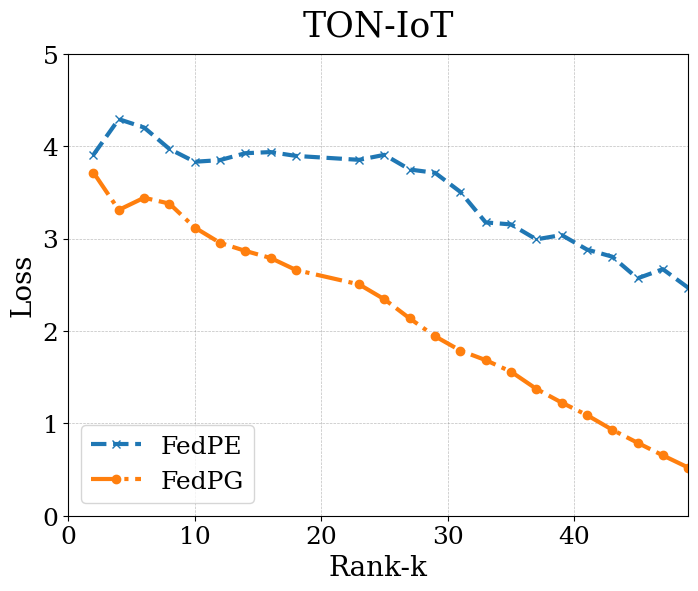

In [7]:
import matplotlib.pyplot as plt

alpha = 0.2
# Data for three lines
glob_iter = FedPE_ton_rank_data['Rank'][:23]
FedPE_acc = FedPE_ton_rank_data['Loss'][:23].ewm(alpha=alpha).mean().values 
FedPG_acc = FedPG_ton_rank_data['Loss'][:23].ewm(alpha=alpha).mean().values 

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_acc, 
         label='FedPE', 
         #color='blue', 
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_acc, 
         label='FedPG', 
         #color='red',
         marker='o', linestyle='-.', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Rank-k', fontsize=20)
plt.ylabel('Loss', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([0, 49])
plt.ylim([0, 5.0])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower left')

plt.title("TON-IoT", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('Ton_RankVsLoss.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


# Local Iter vs Acc

## UNSW

In [55]:
# Get data from csv file
FedPE_acc_local_file_name = 'Unsw_FedPE_Local_iter.csv'
FedPG_acc_local_file_name = 'Unsw_FedPG_Local_iter.csv'
FedPE_acc_local_file_path = unsw_data_path / FedPE_acc_local_file_name
FedPG_acc_local_file_path = unsw_data_path / FedPG_acc_local_file_name
FedPE_unsw_local_data = pd.read_csv(FedPE_acc_local_file_path)
FedPG_unsw_local_data = pd.read_csv(FedPG_acc_local_file_path)
FedPE_unsw_local_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,20,10,2,27.019745,0.578170,0.753386,0.582855,0.657239,0.417145,6.415415
1,20,20,20,2,7.649734,0.544404,0.736286,0.535030,0.619728,0.464970,6.800930
2,20,20,30,2,11.052691,0.705045,0.779707,0.801310,0.790361,0.198690,7.259842
3,20,20,40,2,5.922029,0.754623,0.785824,0.888533,0.834029,0.111467,7.517111
4,20,20,50,2,9.515623,0.765352,0.767359,0.949771,0.848876,0.050229,8.076319
...,...,...,...,...,...,...,...,...,...,...,...
95,20,200,60,2,3.274640,0.828629,0.809787,0.984205,0.888517,0.015795,84.772312
96,20,200,70,2,2.940929,0.827741,0.809137,0.983808,0.887964,0.016192,89.048104
97,20,200,80,2,3.119373,0.828201,0.807434,0.988044,0.888655,0.011956,92.605442
98,20,200,90,2,3.086380,0.830466,0.809025,0.989169,0.890073,0.010831,95.871537


In [56]:
# FedPE
FedPE_local_iter_10 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==10]
FedPE_local_iter_20 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==20]
FedPE_local_iter_30 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==30]
FedPE_local_iter_40 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==40]
FedPE_local_iter_50 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==50]
FedPE_local_iter_60 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==60]
FedPE_local_iter_70 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==70]
FedPE_local_iter_80 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==80]
FedPE_local_iter_90 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==90]
FedPE_local_iter_100 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==100]
glob_iter = FedPE_local_iter_10['Global_iter'].copy(deep=True)

alpha = 0.9
FedPE_local_iter_10_acc = FedPE_local_iter_10["Acc"].ewm(alpha=alpha).mean().values * 100
FedPE_local_iter_20_acc = FedPE_local_iter_20["Acc"]
FedPE_local_iter_30_acc = FedPE_local_iter_30["Acc"]
FedPE_local_iter_40_acc = FedPE_local_iter_40["Acc"].ewm(alpha=alpha).mean().values * 100
FedPE_local_iter_50_acc = FedPE_local_iter_50["Acc"]
FedPE_local_iter_60_acc = FedPE_local_iter_60["Acc"]
FedPE_local_iter_70_acc = FedPE_local_iter_70["Acc"].ewm(alpha=alpha).mean().values * 100
FedPE_local_iter_80_acc = FedPE_local_iter_80["Acc"]
FedPE_local_iter_90_acc = FedPE_local_iter_90["Acc"]
FedPE_local_iter_100_acc = FedPE_local_iter_100["Acc"].ewm(alpha=alpha).mean().values * 100

#FedPG
FedPG_unsw_local_iter_acc = FedPG_unsw_local_data["Acc"].ewm(alpha=alpha).mean().values * 100

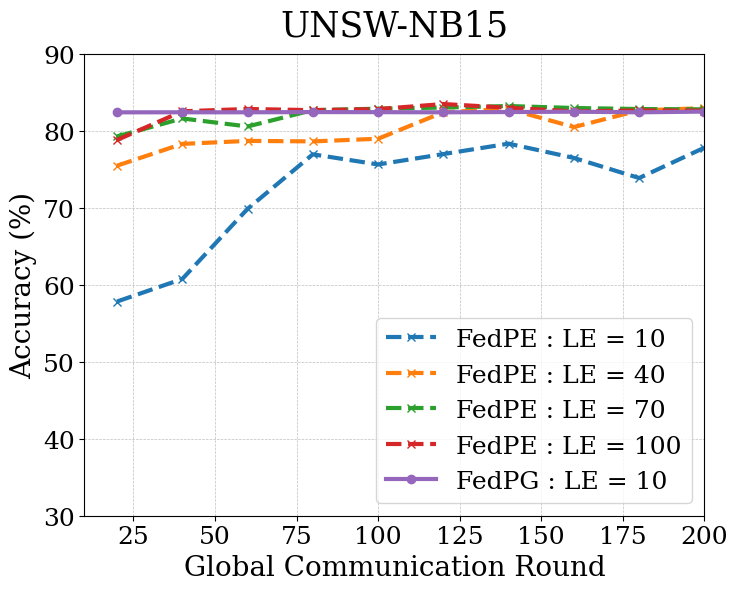

In [57]:
import matplotlib.pyplot as plt

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_local_iter_10_acc, 
         label='FedPE : LE = 10',
         #color='blue', 
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_20_acc, label='FedPE-LocalIter:20', color='green', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_30_acc, label='FedPE-LocalIter:30', color='brown', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_40_acc,
         label='FedPE : LE = 40',
         #color='yellow',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_50_acc, label='FedPE-LocalIter:50', color='orange', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_60_acc, label='FedPE-LocalIter:60', color='purple', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_70_acc,
         label='FedPE : LE = 70',
         #color='pink',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_80_acc, label='FedPE-LocalIter:80', color='gray', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_90_acc, label='FedPE-LocalIter:90', color='black', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_100_acc,
         label='FedPE : LE = 100', 
         #color='gold', 
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_unsw_local_iter_acc,
         label='FedPG : LE = 10',
         #color='red',
         marker='o', linestyle='-', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([10, 200])
plt.ylim([30, 90])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower right')

plt.title("UNSW-NB15", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('UNSW_LocalVsAcc.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


## ToN-IoT

In [133]:
# Get data from csv file
FedPE_acc_local_file_name = 'Ton_FedPE_Local_iter.csv'
FedPG_acc_local_file_name = 'Ton_FedPG_Local_iter.csv'
FedPE_acc_local_file_path = ton_data_path / FedPE_acc_local_file_name
FedPG_acc_local_file_path = ton_data_path / FedPG_acc_local_file_name
FedPE_ton_local_data = pd.read_csv(FedPE_acc_local_file_path)
FedPG_ton_local_data = pd.read_csv(FedPG_acc_local_file_path)
FedPE_ton_local_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,20,10,2,29.210413,0.529216,0.804192,0.589511,0.680317,0.410489,9.113319
1,20,20,20,2,20.753302,0.557537,0.817439,0.617130,0.703300,0.382870,10.029183
2,20,20,30,2,10.457344,0.546689,0.813970,0.604753,0.693935,0.395247,10.662748
3,20,20,40,2,9.827276,0.851045,0.854651,0.993705,0.918948,0.006295,10.327183
4,20,20,50,2,8.563467,0.750049,0.841830,0.869159,0.855276,0.130841,10.311937
...,...,...,...,...,...,...,...,...,...,...,...
195,20,200,60,2,3.826682,0.850083,0.850181,0.999752,0.918920,0.000248,118.004319
196,20,200,70,2,3.340126,0.850068,0.850189,0.999717,0.918910,0.000283,111.361423
197,20,200,80,2,2.729322,0.851270,0.851287,0.999593,0.919499,0.000407,114.765670
198,20,200,90,2,3.257335,0.848761,0.865363,0.973478,0.916242,0.026522,124.057112


In [154]:
# FedPE
FedPE_local_iter_10 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==10]
FedPE_local_iter_20 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==20]
FedPE_local_iter_30 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==30]
FedPE_local_iter_40 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==40]
FedPE_local_iter_50 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==50]
FedPE_local_iter_60 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==60]
FedPE_local_iter_70 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==70]
FedPE_local_iter_80 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==80]
FedPE_local_iter_90 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==90]
FedPE_local_iter_100 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==100]
glob_iter = FedPE_local_iter_10['Global_iter'][:10].copy(deep=True)

alpha = 0.2
FedPE_local_iter_10_acc = FedPE_local_iter_10["Acc"][:10].ewm(alpha=alpha).mean().values * 100
FedPE_local_iter_20_acc = FedPE_local_iter_20["Acc"][:10]
FedPE_local_iter_30_acc = FedPE_local_iter_30["Acc"][:10]
FedPE_local_iter_40_acc = FedPE_local_iter_40["Acc"][:10].ewm(alpha=alpha).mean().values * 100
FedPE_local_iter_50_acc = FedPE_local_iter_50["Acc"][:10]
FedPE_local_iter_60_acc = FedPE_local_iter_60["Acc"][:10]
FedPE_local_iter_70_acc = FedPE_local_iter_70["Acc"][:10].ewm(alpha=alpha).mean().values * 100
FedPE_local_iter_80_acc = FedPE_local_iter_80["Acc"][:10]
FedPE_local_iter_90_acc = FedPE_local_iter_90["Acc"][:10]
FedPE_local_iter_100_acc = FedPE_local_iter_100["Acc"][:10].ewm(alpha=alpha).mean().values * 100

#FedPG
FedPG_ton_local_iter_acc = FedPG_ton_local_data["Acc"][:10].ewm(alpha=alpha).mean().values * 100

In [155]:
FedPG_ton_local_iter_acc

array([88.59473834, 88.59223423, 88.58895013, 88.59141988, 88.58972534,
       88.59434217, 88.5952029 , 88.58281481, 88.5904283 , 88.59206728])

In [156]:
glob_iter.shape

(10,)

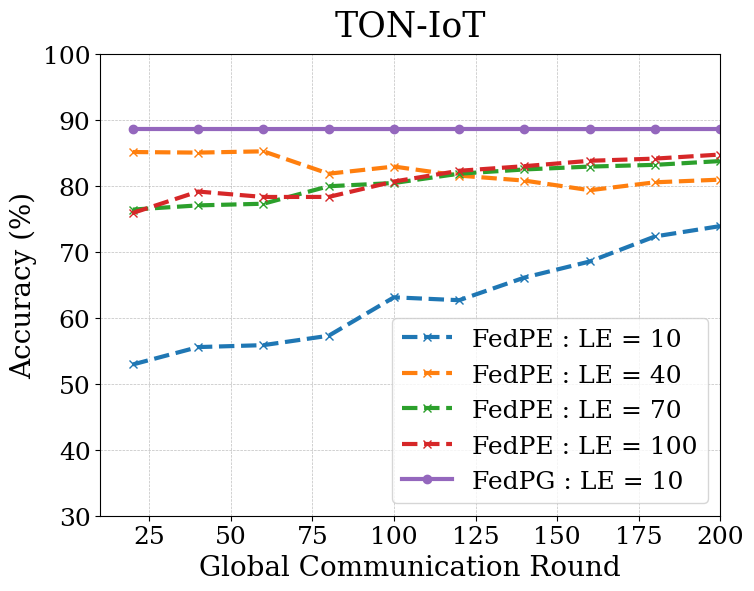

In [159]:
import matplotlib.pyplot as plt

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

# Set the figure size
plt.figure(figsize=(8, 6))

#glob_iter = np.arange(len(FedPE_local_iter_10_acc))
# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_local_iter_10_acc, 
         label='FedPE : LE = 10',
         #color='blue', 
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_20_acc, label='FedPE-LocalIter:20', color='green', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_30_acc, label='FedPE-LocalIter:30', color='brown', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_40_acc,
         label='FedPE : LE = 40',
         #color='yellow',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_50_acc, label='FedPE-LocalIter:50', color='orange', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_60_acc, label='FedPE-LocalIter:60', color='purple', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_70_acc,
         label='FedPE : LE = 70',
         #color='pink',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_80_acc, label='FedPE-LocalIter:80', color='gray', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_90_acc, label='FedPE-LocalIter:90', color='black', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_100_acc,
         label='FedPE : LE = 100', 
         #color='gold', 
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_ton_local_iter_acc,
         label='FedPG : LE = 10',
         #color='red',
         marker='o', linestyle='-', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([10, 200])
plt.ylim([30, 100])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=18, loc='lower right')

plt.title("TON-IoT", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('Ton_LocalVsAcc.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


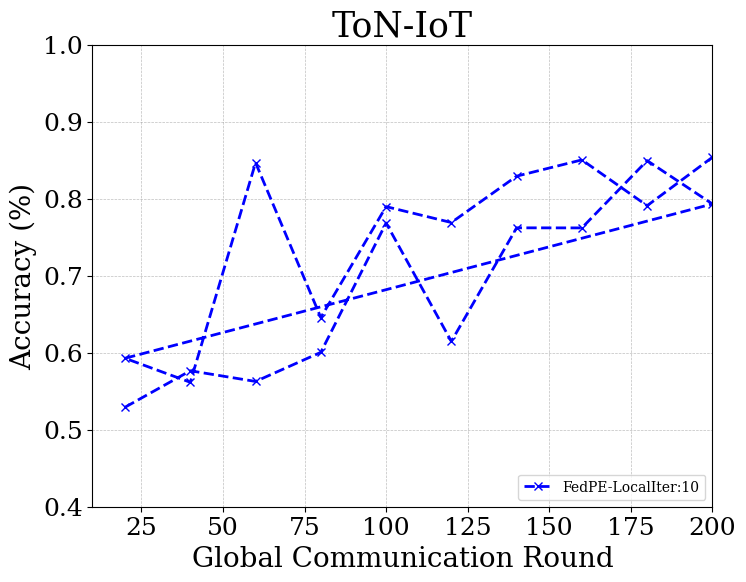

In [122]:
import matplotlib.pyplot as plt

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_local_iter_10_acc,
         label='FedPE-LocalIter:10',
         color='blue', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_20_acc, label='FedPE-LocalIter:20', color='green', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_30_acc, label='FedPE-LocalIter:30', color='brown', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_40_acc, label='FedPE-LocalIter:40', color='yellow', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_50_acc, label='FedPE-LocalIter:50', color='orange', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_60_acc, label='FedPE-LocalIter:60', color='purple', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_70_acc, label='FedPE-LocalIter:70', color='pink', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_80_acc, label='FedPE-LocalIter:80', color='gray', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_90_acc, label='FedPE-LocalIter:90', color='black', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_100_acc, label='FedPE-LocalIter:100', color='gold', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPG_ton_local_iter_acc, label='FedPG-LocalIter:10', color='red', marker='o', linestyle='-.', linewidth=2)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([10, 200])
plt.ylim([0.4, 1.0])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=10, loc='lower right')

plt.title("ToN-IoT", fontsize=25)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('Ton_LocalVsAcc.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


# Local Iter vs Time

## UNSW

In [10]:
# Get data from csv file
FedPE_acc_local_file_name = 'Unsw_FedPE_Local_iter.csv'
FedPG_acc_local_file_name = 'Unsw_FedPG_Local_iter.csv'
FedPE_acc_local_file_path = unsw_data_path / FedPE_acc_local_file_name
FedPG_acc_local_file_path = unsw_data_path / FedPG_acc_local_file_name
FedPE_unsw_local_data = pd.read_csv(FedPE_acc_local_file_path)
FedPG_unsw_local_data = pd.read_csv(FedPG_acc_local_file_path)
FedPE_unsw_local_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,20,10,2,27.019745,0.578170,0.753386,0.582855,0.657239,0.417145,6.415415
1,20,20,20,2,7.649734,0.544404,0.736286,0.535030,0.619728,0.464970,6.800930
2,20,20,30,2,11.052691,0.705045,0.779707,0.801310,0.790361,0.198690,7.259842
3,20,20,40,2,5.922029,0.754623,0.785824,0.888533,0.834029,0.111467,7.517111
4,20,20,50,2,9.515623,0.765352,0.767359,0.949771,0.848876,0.050229,8.076319
...,...,...,...,...,...,...,...,...,...,...,...
95,20,200,60,2,3.274640,0.828629,0.809787,0.984205,0.888517,0.015795,84.772312
96,20,200,70,2,2.940929,0.827741,0.809137,0.983808,0.887964,0.016192,89.048104
97,20,200,80,2,3.119373,0.828201,0.807434,0.988044,0.888655,0.011956,92.605442
98,20,200,90,2,3.086380,0.830466,0.809025,0.989169,0.890073,0.010831,95.871537


In [11]:
# FedPE
FedPE_local_iter_10 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==10]
FedPE_local_iter_20 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==20]
FedPE_local_iter_30 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==30]
FedPE_local_iter_40 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==40]
FedPE_local_iter_50 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==50]
FedPE_local_iter_60 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==60]
FedPE_local_iter_70 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==70]
FedPE_local_iter_80 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==80]
FedPE_local_iter_90 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==90]
FedPE_local_iter_100 = FedPE_unsw_local_data[FedPE_unsw_local_data['Local_iter']==100]
glob_iter = FedPE_local_iter_10['Global_iter'].copy(deep=True)

FedPE_local_iter_10_time = FedPE_local_iter_10["Time"]
FedPE_local_iter_20_time = FedPE_local_iter_20["Time"]
FedPE_local_iter_30_time = FedPE_local_iter_30["Time"]
FedPE_local_iter_40_time = FedPE_local_iter_40["Time"]
FedPE_local_iter_50_time = FedPE_local_iter_50["Time"]
FedPE_local_iter_60_time = FedPE_local_iter_60["Time"]
FedPE_local_iter_70_time = FedPE_local_iter_70["Time"]
FedPE_local_iter_80_time = FedPE_local_iter_80["Time"]
FedPE_local_iter_90_time = FedPE_local_iter_90["Time"]
FedPE_local_iter_100_time = FedPE_local_iter_100["Time"]

#FedPG
FedPG_unsw_local_iter_time = FedPG_unsw_local_data["Time"]

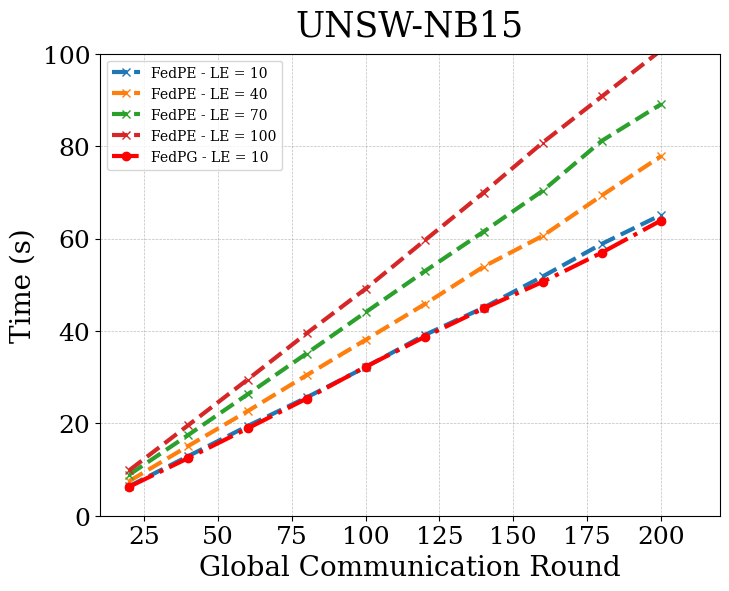

In [17]:
import matplotlib.pyplot as plt

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_local_iter_10_time, 
         label='FedPE - LE = 10', 
         #color='blue', 
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_20_time, label='FedPE-LocalIter:20', color='green', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_30_time, label='FedPE-LocalIter:30', color='brown', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_40_time, 
         label='FedPE - LE = 40', 
         #color='yellow',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_50_time, label='FedPE-LocalIter:50', color='orange', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_60_time, label='FedPE-LocalIter:60', color='purple', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_70_time, 
         label='FedPE - LE = 70', 
         #color='pink', 
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_80_time, label='FedPE-LocalIter:80', color='gray', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_90_time, label='FedPE-LocalIter:90', color='black', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_100_time, 
         label='FedPE - LE = 100', 
         #color='gold', 
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_unsw_local_iter_time, 
         label='FedPG - LE = 10', 
         color='red', 
         marker='o', linestyle='-.', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Time (s)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([10, 220])
plt.ylim([0, 100.0])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=10, loc='upper left')

plt.title("UNSW-NB15", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('UNSW_LocalVsTime.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


## ToN-IoT

In [53]:
# Get data from csv file
FedPE_acc_local_file_name = 'Ton_FedPE_Local_iter.csv'
FedPG_acc_local_file_name = 'Ton_FedPG_Local_iter.csv'
FedPE_acc_local_file_path = ton_data_path / FedPE_acc_local_file_name
FedPG_acc_local_file_path = ton_data_path / FedPG_acc_local_file_name
FedPE_ton_local_data = pd.read_csv(FedPE_acc_local_file_path)
FedPG_ton_local_data = pd.read_csv(FedPG_acc_local_file_path)
FedPE_ton_local_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,20,20,10,2,29.210413,0.529216,0.804192,0.589511,0.680317,0.410489,9.113319
1,20,20,20,2,20.753302,0.557537,0.817439,0.617130,0.703300,0.382870,10.029183
2,20,20,30,2,10.457344,0.546689,0.813970,0.604753,0.693935,0.395247,10.662748
3,20,20,40,2,9.827276,0.851045,0.854651,0.993705,0.918948,0.006295,10.327183
4,20,20,50,2,8.563467,0.750049,0.841830,0.869159,0.855276,0.130841,10.311937
...,...,...,...,...,...,...,...,...,...,...,...
95,20,200,60,2,3.967005,0.844089,0.850944,0.989922,0.915187,0.010078,104.438056
96,20,200,70,2,3.068557,0.857235,0.861867,0.990788,0.921842,0.009212,110.779471
97,20,200,80,2,3.297079,0.846898,0.862395,0.975476,0.915457,0.024524,111.278570
98,20,200,90,2,3.959396,0.859188,0.858434,0.999045,0.923418,0.000955,117.954223


In [54]:
# FedPE
FedPE_local_iter_10 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==10]
FedPE_local_iter_20 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==20]
FedPE_local_iter_30 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==30]
FedPE_local_iter_40 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==40]
FedPE_local_iter_50 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==50]
FedPE_local_iter_60 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==60]
FedPE_local_iter_70 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==70]
FedPE_local_iter_80 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==80]
FedPE_local_iter_90 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==90]
FedPE_local_iter_100 = FedPE_ton_local_data[FedPE_ton_local_data['Local_iter']==100]
glob_iter = FedPE_local_iter_10['Global_iter'].copy(deep=True)

FedPE_local_iter_10_time = FedPE_local_iter_10["Time"]
FedPE_local_iter_20_time = FedPE_local_iter_20["Time"]
FedPE_local_iter_30_time = FedPE_local_iter_30["Time"]
FedPE_local_iter_40_time = FedPE_local_iter_40["Time"]
FedPE_local_iter_50_time = FedPE_local_iter_50["Time"]
FedPE_local_iter_60_time = FedPE_local_iter_60["Time"]
FedPE_local_iter_70_time = FedPE_local_iter_70["Time"]
FedPE_local_iter_80_time = FedPE_local_iter_80["Time"]
FedPE_local_iter_90_time = FedPE_local_iter_90["Time"]
FedPE_local_iter_100_time = FedPE_local_iter_100["Time"]

#FedPG
FedPG_ton_local_iter_time = FedPG_ton_local_data["Time"]

In [55]:
FedPE_local_iter_10_time

0      9.113319
10    17.914995
20    27.630584
30    34.075079
40    40.983597
50    49.081734
60    58.225136
70    69.086035
80    74.588968
90    83.944376
Name: Time, dtype: float64

In [56]:
FedPG_ton_local_iter_time

0     8.188718
1    19.301827
2    28.039371
3    37.400335
4    45.077885
5    53.090564
6    59.328361
7    74.495256
8    84.613919
9    88.452230
Name: Time, dtype: float64

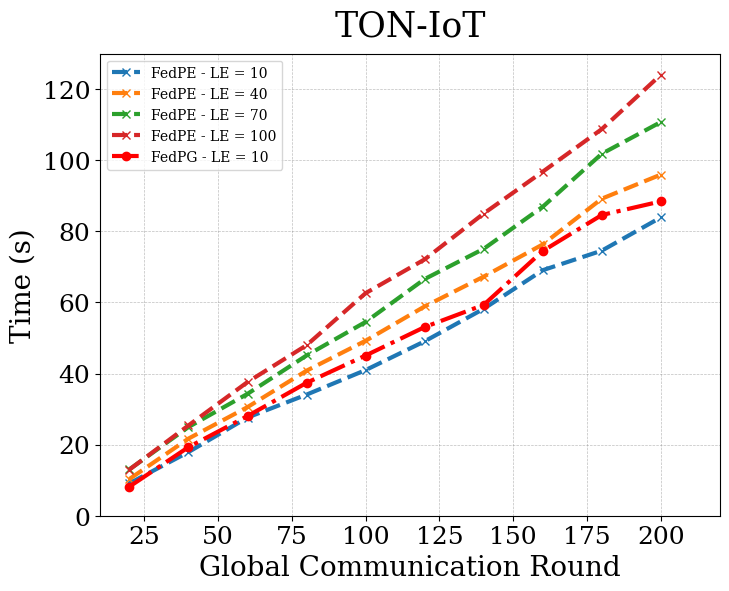

In [57]:
import matplotlib.pyplot as plt

# Set the font family and font size
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the lines with customized colors and line styles
plt.plot(glob_iter, FedPE_local_iter_10_time, 
         label='FedPE - LE = 10', 
         #color='blue',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_20_time, label='FedPE-LocalIter:20', color='green', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_30_time, label='FedPE-LocalIter:30', color='brown', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_40_time, 
         label='FedPE - LE = 40',
         #color='yellow',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_50_time, label='FedPE-LocalIter:50', color='orange', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_60_time, label='FedPE-LocalIter:60', color='purple', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_70_time,
         label='FedPE - LE = 70',
         #color='pink',
         marker='x', linestyle='--', linewidth=3)
#plt.plot(glob_iter, FedPE_local_iter_80_time, label='FedPE-LocalIter:80', color='gray', marker='x', linestyle='--', linewidth=2)
#plt.plot(glob_iter, FedPE_local_iter_90_time, label='FedPE-LocalIter:90', color='black', marker='x', linestyle='--', linewidth=2)
plt.plot(glob_iter, FedPE_local_iter_100_time,
         label='FedPE - LE = 100',
         #color='gold',
         marker='x', linestyle='--', linewidth=3)
plt.plot(glob_iter, FedPG_ton_local_iter_time,
         label='FedPG - LE = 10',
         color='red',
         marker='o', linestyle='-.', linewidth=3)
# plt.plot(epochs, accuracy_3, label='Line 3', color='green', marker='+', linestyle=':', linewidth=2)
# plt.plot(epochs, accuracy_4, label='Line 4', color='purple', marker='*',  linewidth=2)

# Adding axis labels and title with customized font size and position
plt.xlabel('Global Communication Round', fontsize=20)
plt.ylabel('Time (s)', fontsize=20)
#plt.title('Test accuracy vs Epochs', fontsize=16, y=1.05)

# Setting the limits of the axes with customized tick labels and font size
plt.xlim([10, 220])
plt.ylim([0, 130])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Adding a legend with customized font size and position
plt.legend(fontsize=10, loc='upper left')

plt.title("TON-IoT", fontsize=25, y = 1.02)

# Adding grid lines with customized style and alpha
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Saving the figure as a high-quality PDF
plt.savefig('Ton_LocalVsTime.pdf', dpi=300, bbox_inches='tight')

# Displaying the plot
plt.show()


# N_clients vs Time

## UNSW

In [73]:
# Get data from csv file
FedPE_n_clients_file_name = 'Unsw_FedPE_N_clients.csv'
FedPG_n_clients_file_name = 'Unsw_FedPG_N_clients.csv'
FedPE_n_clients_file_path = unsw_data_path / FedPE_n_clients_file_name
FedPG_n_clients_file_path = unsw_data_path / FedPG_n_clients_file_name
FedPE_unsw_client_data = pd.read_csv(FedPE_n_clients_file_path)
FedPG_unsw_client_data = pd.read_csv(FedPG_n_clients_file_path)
FedPE_unsw_client_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,100,200,30,2,3.513141,0.829195,0.810590,0.983698,0.888794,0.016302,113.870981
1,200,200,30,2,3.264897,0.819139,0.800150,0.985485,0.883200,0.014515,161.538244
2,300,200,30,2,3.226647,0.828690,0.809778,0.984338,0.888566,0.015662,210.380831
3,400,200,30,2,3.190709,0.828445,0.809644,0.984139,0.888404,0.015861,258.465595
4,500,200,30,2,3.299597,0.828400,0.809656,0.984029,0.888367,0.015971,310.765678
5,600,200,30,2,3.180781,0.828430,0.809697,0.984007,0.888382,0.015993,354.803531
6,700,200,30,2,3.082716,0.827665,0.808627,0.984669,0.888007,0.015331,401.833030
7,800,200,30,2,3.119071,0.827650,0.808757,0.984382,0.887969,0.015618,451.100666
8,900,200,30,2,3.036168,0.827359,0.808792,0.983764,0.887739,0.016236,508.541097
9,1000,200,30,2,3.099888,0.827542,0.808543,0.984602,0.887930,0.015398,550.038802


In [74]:
FedPG_unsw_client_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,100,30,30,2,3.065168,0.823899,0.803202,0.988375,0.886219,0.011625,14.559959
1,200,30,30,2,3.033981,0.823838,0.803242,0.988176,0.886163,0.011824,19.263747
2,300,30,30,2,3.017541,0.823899,0.803256,0.988264,0.886207,0.011736,23.911451
3,400,30,30,2,2.877949,0.824221,0.803668,0.988044,0.886369,0.011956,28.203825
4,500,30,30,2,2.946550,0.824007,0.803390,0.988198,0.886262,0.011802,33.494817
5,600,30,30,2,2.869480,0.824359,0.803786,0.988066,0.886450,0.011934,38.185135
6,700,30,30,2,2.888531,0.824144,0.803443,0.988353,0.886357,0.011647,43.165462
7,800,30,30,2,2.859670,0.824343,0.803652,0.988308,0.886466,0.011692,47.357231
8,900,30,30,2,2.843533,0.824313,0.803547,0.988463,0.886464,0.011537,51.821537
9,1000,30,30,2,2.820320,0.824389,0.803761,0.988176,0.886479,0.011824,56.631747


In [75]:
import numpy as np
FedPE_unsw_client_data_acc = FedPE_unsw_client_data["Acc"]
FedPG_unsw_client_data_acc = FedPG_unsw_client_data["Acc"]
FedPE_unsw_client_data_time = FedPE_unsw_client_data["Time"]
FedPG_unsw_client_data_time = FedPG_unsw_client_data["Time"]
n_clients = FedPG_unsw_client_data["N_clients"]
FedPE_unsw_client_data_time, FedPG_unsw_client_data_time = FedPE_unsw_client_data_time.to_numpy(), FedPG_unsw_client_data_time.to_numpy()
FedPE_unsw_client_data_time, FedPG_unsw_client_data_time = FedPE_unsw_client_data_time.reshape(-1, 1), FedPG_unsw_client_data_time.reshape(-1,1)
time = np.concatenate((FedPE_unsw_client_data_time, FedPG_unsw_client_data_time), axis=1)
time = time.T

In [81]:
accuracy_pg

0    82.389947
3    82.422090
5    82.435866
7    82.434335
9    82.438927
Name: Acc, dtype: float64

/tmp/ipykernel_3078058/3297205051.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x, accuracy_pe, "k-", marker="d", color="black", label="FedPE")
/tmp/ipykernel_3078058/3297205051.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x, accuracy_pg, "k-", marker="h", color="red", label="FedPG")


<Figure size 800x600 with 0 Axes>

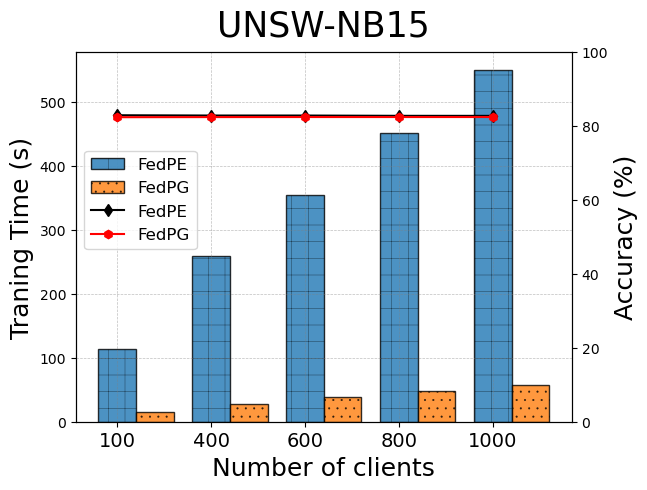

In [79]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import textwrap
mpl.rcParams['hatch.linewidth'] = 0.25  # previous pdf hatch linewidth
# Sample data

select = [0, 3, 5, 7, 9]
algorithms = ["FedPE", "FedPG"]

accuracy_pe = FedPE_unsw_client_data_acc[select]*100

accuracy_pg = FedPG_unsw_client_data_acc[select]*100

n_clients = n_clients[select]
times = time[:, select]

hatches = ["+", "..", "+", ".", "\\", "|"]

# Wrap algorithm names
wrapped_algorithms = ['\n'.join(textwrap.wrap(alg, width=12)) for alg in algorithms]

# Colors for each algorithm
#colors = ['firebrick', 'darkorange', 'royalblue', 'dodgerblue', 'gold', 'firebrick', 'mediumseagreen', 'darkviolet']


# Set the figure size
plt.figure(figsize=(8, 6))
# Create a combined bar and line plot
fig, ax1 = plt.subplots()

# Bar plot with different colors for each algorithm
bar_width = 0.4
index = np.arange(len(n_clients))
x = np.arange(len(n_clients))
opacity = 0.8

for i, (alg, size, color, hatch) in enumerate(zip(algorithms, times, colors, hatches)):
    ax1.bar(index + i * bar_width, size, bar_width, hatch=hatch, #color=color,
            alpha=opacity, edgecolor="k", label=f"{alg}")
    #ax1.bar(i, size, color=color, alpha=0.6, hatch=hatch, label=f"{alg}")

ax1.tick_params(axis='x', labelsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(n_clients)
#ax1.set_ylim(0, 500)
ax1.set_ylabel("Traning Time (s)", fontsize=18)
ax1.set_xlabel("Number of clients", fontsize=18)
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
# Adding grid lines with customized style and alpha

# Line plot
ax2 = ax1.twinx()
ax2.plot(x, accuracy_pe, "k-", marker="d", color="black", label="FedPE")
ax2.plot(x, accuracy_pg, "k-", marker="h", color="red", label="FedPG")
ax2.set_ylim(0, 100)
ax2.set_ylabel("Accuracy (%)", fontsize=18)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="center left", bbox_to_anchor=(0., 0.6), ncols = 1, fontsize=12)

# Axis labels
plt.xlabel("Algorithms")
plt.title("UNSW-NB15", fontsize=25, y = 1.02)
plt.savefig('UNSW_time_acc.pdf', dpi=300, bbox_inches='tight')

plt.show()

## ToN-IoT

In [82]:
# Get data from csv file
FedPE_n_clients_file_name = 'Ton_FedPE_N_clients.csv'
FedPG_n_clients_file_name = 'Ton_FedPG_N_clients.csv'
FedPE_n_clients_file_path = ton_data_path / FedPE_n_clients_file_name
FedPG_n_clients_file_path = ton_data_path / FedPG_n_clients_file_name
FedPE_ton_client_data = pd.read_csv(FedPE_n_clients_file_path)
FedPG_ton_client_data = pd.read_csv(FedPG_n_clients_file_path)
FedPE_ton_client_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,100,200,30,2,3.324142,0.753174,0.843823,0.870679,0.857041,0.129321,129.684983
1,200,200,30,2,3.181001,0.791006,0.851925,0.912690,0.881261,0.087310,178.207486
2,300,200,30,2,3.012324,0.788272,0.860539,0.896052,0.877936,0.103948,220.360981
3,400,200,30,2,2.901147,0.848431,0.866249,0.971657,0.915931,0.028343,263.343113
4,500,200,30,2,2.890968,0.837778,0.868616,0.953286,0.908984,0.046714,304.628264
5,600,200,30,2,2.766999,0.855027,0.874151,0.968881,0.919081,0.031119,346.608392
6,700,200,30,2,2.590971,0.858858,0.878145,0.968262,0.921004,0.031738,390.976354
7,800,200,30,2,2.715027,0.859759,0.879088,0.968121,0.921459,0.031879,433.390518
8,900,200,30,2,2.724585,0.864748,0.884731,0.966795,0.923944,0.033205,476.558960
9,1000,200,30,2,2.608462,0.865514,0.885549,0.966671,0.924333,0.033329,518.443410


In [83]:
FedPG_ton_client_data

,N_clients,Global_iter,Local_iter,Rank,Loss,Acc,Precision,Recall,F1-score,FN,Time
0,100,30,30,2,3.388797,0.885932,0.905494,0.966653,0.935074,0.033347,17.271513
1,200,30,30,2,2.891538,0.885962,0.905524,0.966653,0.935090,0.033347,22.117203
2,300,30,30,2,2.717834,0.886023,0.905584,0.966653,0.935122,0.033347,26.676774
3,400,30,30,2,2.646562,0.885932,0.905494,0.966653,0.935074,0.033347,30.146806
4,500,30,30,2,2.559193,0.885992,0.905554,0.966653,0.935106,0.033347,34.334644
5,600,30,30,2,2.672822,0.885932,0.905494,0.966653,0.935074,0.033347,39.010983
6,700,30,30,2,2.572230,0.886007,0.905569,0.966653,0.935114,0.033347,42.861394
7,800,30,30,2,2.577728,0.885932,0.905494,0.966653,0.935074,0.033347,47.252707
8,900,30,30,2,2.604568,0.886023,0.905584,0.966653,0.935122,0.033347,51.276894
9,1000,30,30,2,2.541300,0.886053,0.905614,0.966653,0.935138,0.033347,55.655127


In [84]:
import numpy as np
FedPE_ton_client_data_acc = FedPE_ton_client_data["Acc"]
FedPG_ton_client_data_acc = FedPG_ton_client_data["Acc"]
FedPE_ton_client_data_time = FedPE_ton_client_data["Time"]
FedPG_ton_client_data_time = FedPG_ton_client_data["Time"]
n_clients = FedPG_ton_client_data["N_clients"]
FedPE_ton_client_data_time, FedPG_ton_client_data_time = FedPE_ton_client_data_time.to_numpy(), FedPG_ton_client_data_time.to_numpy()
FedPE_ton_client_data_time, FedPG_ton_client_data_time = FedPE_ton_client_data_time.reshape(-1, 1), FedPG_ton_client_data_time.reshape(-1,1)

In [85]:
FedPE_ton_client_data_time.T

array([[129.68498278, 178.20748615, 220.36098099, 263.34311295,
        304.62826443, 346.60839248, 390.97635436, 433.39051819,
        476.5589602 , 518.4434104 ]])

In [86]:
FedPG_ton_client_data_time.T

array([[17.27151251, 22.117203  , 26.67677379, 30.146806  , 34.33464408,
        39.01098251, 42.86139393, 47.25270677, 51.27689409, 55.65512729,
        16.90856457]])

In [87]:
time = np.concatenate((FedPE_unsw_client_data_time[:10], FedPG_unsw_client_data_time[:10]), axis=1)
time = time.T
time

array([[113.87098145, 161.53824401, 210.38083124, 258.46559525,
        310.76567769, 354.80353069, 401.83302951, 451.10066557,
        508.5410974 , 550.03880215],
       [ 14.5599587 ,  19.26374745,  23.9114511 ,  28.20382452,
         33.49481702,  38.18513489,  43.16546249,  47.35723114,
         51.82153702,  56.63174725]])

In [88]:
accuracy_pe

0    82.919549
3    82.844548
5    82.843017
7    82.764954
9    82.754240
Name: Acc, dtype: float64

/tmp/ipykernel_3078058/4209813413.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x, accuracy_pe, "k-", marker="d", color="black", label="FedPE")
/tmp/ipykernel_3078058/4209813413.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x, accuracy_pg, "k-", marker="h", color="red", label="FedPG")


<Figure size 800x600 with 0 Axes>

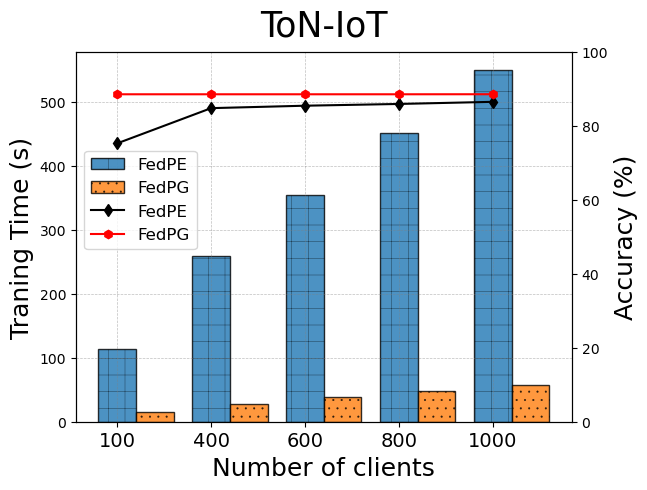

In [91]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import textwrap
mpl.rcParams['hatch.linewidth'] = 0.25  # previous pdf hatch linewidth
# Sample data
select = [0, 3, 5, 7, 9]
algorithms = ["FedPE", "FedPG"]

accuracy_pe = FedPE_ton_client_data_acc[select]*100

accuracy_pg = FedPG_ton_client_data_acc[select]*100

n_clients = n_clients[select]

times = time[:, select]
hatches = ["+", "..", "//", "..", "\\", "|"]

# Wrap algorithm names
wrapped_algorithms = ['\n'.join(textwrap.wrap(alg, width=12)) for alg in algorithms]

# Colors for each algorithm
#colors = ["#f28482", "#84a59d", "b", "g", "purple", "b"]

plt.figure(figsize=(8, 6))
# Create a combined bar and line plot
fig, ax1 = plt.subplots()


# Bar plot with different colors for each algorithm
bar_width = 0.4
index = np.arange(len(n_clients))
x = np.arange(len(n_clients))
opacity = 0.8
for i, (alg, size, color, hatch) in enumerate(zip(algorithms, times, colors, hatches)):
    ax1.bar(index + i * bar_width, size, bar_width,# color=color, 
alpha=opacity, hatch=hatch, edgecolor="k", label=f"{alg}")
    #ax1.bar(i, size, color=color, alpha=0.6, hatch=hatch, label=f"{alg}")

ax1.tick_params(axis='x', labelsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(n_clients)
#ax1.set_ylim(0, 500)
ax1.set_ylabel("Traning Time (s)", fontsize=18)
ax1.set_xlabel("Number of clients", fontsize=18)
ax1.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
# Line plot
ax2 = ax1.twinx()
ax2.plot(x, accuracy_pe, "k-", marker="d", color="black", label="FedPE")
ax2.plot(x, accuracy_pg, "k-", marker="h", color="red", label="FedPG")
ax2.set_ylim(0, 100)
ax2.set_ylabel("Accuracy (%)", fontsize=18)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="center left", bbox_to_anchor=(0., 0.6), ncols = 1, fontsize=12)

# Axis labels
plt.xlabel("Algorithms")
plt.title("ToN-IoT", fontsize=25, y = 1.02)
plt.savefig('Ton_time_acc.pdf', dpi=300, bbox_inches='tight')

plt.show()